# Introduction to Regression with Neural Networks

In [3]:
import tensorflow as tf

print(tf.__version__)

2.0.0-beta1


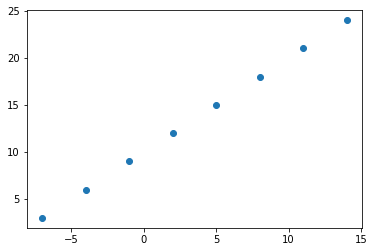

In [11]:
# Creating Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create Labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize
plt.scatter(X, y)

## Input and Output shapes

In [12]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [13]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [14]:
# Convert Numpy Arrays to Tensors
X = tf.constant(X)
y = tf.constant(y)

## Steps in Modeling

In [39]:
# Set Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

ValueError: Input 0 of layer sequential_5 is incompatible with the layer: : expected min_ndim=2, found ndim=1. Full shape received: [None]

In [37]:
# Do a prediction with our trained model.
y_pred = model.predict([17.])
y_pred

IndexError: list index out of range

## Improving the model

In [5]:
# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

NameError: name 'X' is not defined

In [35]:
model.predict([17.0])

array([[11.064862]], dtype=float32)

## Evaluating a model

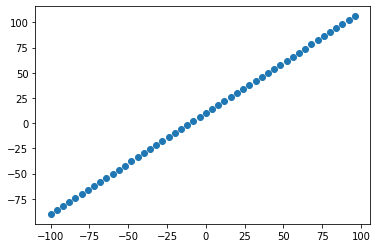

In [34]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make bigger label set
y = X + 10

plt.scatter(X, y);

In [33]:
X_train = X[:40] # 80 Percent of data
X_test = X[40:] # The last 20 percent of data

y_train = y[:40]
y_test = y[40:]

## Visualizing the data

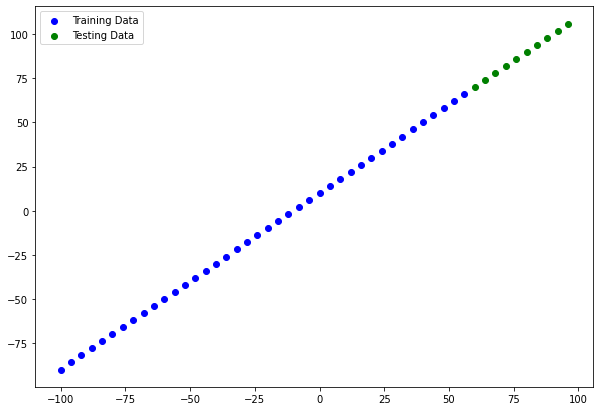

In [32]:
plt.figure(figsize=(10, 7))

# Training Data = blue, Testing Data = Green
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show Legend
plt.legend();

In [31]:
# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

## Visualizing the model

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 3. Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
y_prediction = model.predict(X_test)

y_prediction

array([[ 64.88796 ],
       [ 69.1232  ],
       [ 73.35844 ],
       [ 77.59367 ],
       [ 81.82892 ],
       [ 86.064156],
       [ 90.29939 ],
       [ 94.53464 ],
       [ 98.769875],
       [103.00511 ]], dtype=float32)

In [1]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=true)

/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

NameError: name 'model' is not defined

In [29]:
# Plotting Function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_prediction):
    # Set Figure Size.
    plt.figure(figsize=(10, 7))

    # Set axis for Training data.
    plt.scatter(train_data, train_labels, c="b", label="Training Data")

    # Set axis for Testing data.
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")

    # Set axis of the predictions.
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show Legend on generated plot.
    plt.legend();

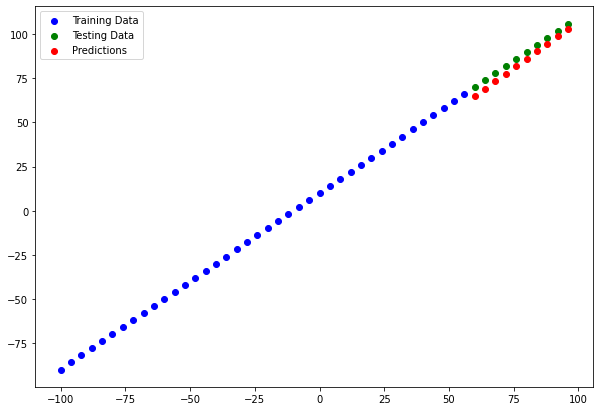

In [30]:
    plot_predictions()